In [1]:
import pandas as pd
import math

events_england = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\events_Germany.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

In [2]:
# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

In [3]:
events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)


In [4]:
period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england


,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,10,Shot,529.393731,179896639,2516739,1H,134383,"[{'y': 59, 'x': 95}, {'y': 0, 'x': 0}]",100,Shot,2444,goal,0-9
1,10,Shot,1078.302328,179896833,2516739,1H,209091,"[{'y': 53, 'x': 98}, {'y': 0, 'x': 0}]",100,Shot,2444,goal,9-18
2,3,Free Kick,421.309818,179897463,2516739,2H,14817,"[{'y': 50, 'x': 89}, {'y': 39, 'x': 89}]",35,Penalty,2444,goal,45-54
3,10,Shot,1161.062618,179897673,2516739,2H,105619,"[{'y': 71, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,2446,goal,63-72
4,10,Shot,2325.296611,180021286,2516740,2H,69411,"[{'y': 43, 'x': 77}, {'y': 0, 'x': 0}]",100,Shot,2482,goal,81-90
5,10,Shot,30.694360,180030800,2516741,2H,15020,"[{'y': 74, 'x': 89}, {'y': 0, 'x': 0}]",100,Shot,2457,goal,45-54
6,10,Shot,985.741060,180031151,2516741,2H,15020,"[{'y': 38, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,2457,goal,54-63
7,10,Shot,193.963316,180431159,2516743,2H,236528,"[{'y': 58, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,2454,goal,45-54
8,3,Free Kick,2581.449202,180057378,2516744,1H,144766,"[{'y': 51, 'x': 90}, {'y': 63, 'x': 89}]",35,Penalty,2449,goal,36-45
9,10,Shot,1636.079140,180057878,2516744,2H,105378,"[{'y': 30, 'x': 90}, {'y': 0, 'x': 0}]",100,Shot,2449,goal,72-81


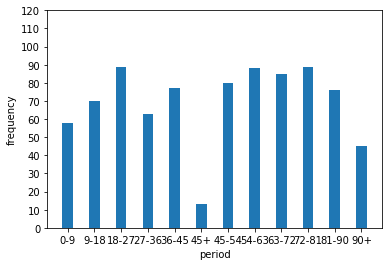

In [6]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
    
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('period')
plt.ylabel('frequency')
plt.show()


In [7]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

# only premier league's teams

teams = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'Germany':
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    
    
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"


[('Bayern M\\u00fcnchen', 10),
 ('Schalke 04', 6),
 ('Hannover 96', 6),
 ('Hoffenheim', 6),
 ('K\\u00f6ln', 5),
 ('RB Leipzig', 5),
 ('Bayer Leverkusen', 4),
 ('Borussia Dortmund', 4),
 ('Hertha BSC', 4),
 ('Freiburg', 4)]

In [8]:
players = pd.read_json('C:\\Users\\Gabriele\\Desktop\\datasets\\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [9]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period


['A. Kramari\\u0107',
 'T. M\\u00fcller',
 'R. Lewandowski',
 'S. Wagner',
 'M. Uth',
 'M. Gregoritsch']